In [1]:
import pandas as pd
import shutil
from IPython.display import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Subset Flickr 30k Into Sports

In [2]:
captions = pd.read_csv('results.csv',header = 0, sep = '|')

In [3]:
captions.head(10)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [4]:
# Defining list of keywords
keywords = [
    #' sport ',
    'soccer', 
    'hockey', 
    'basketball', 
    'football', 
    'baseball player', 
    'tennis', 
    'golf', 
    'rugby',
    'volleyball',
    'badminton',
    'skateboard',
    'lacrosse',
    'bowling',
    'snowboard',
    'skiing'
]

# words to exclude
exclude_words = ['dog']

# images to exclude upon visual inspection
exclude_img = [
    '135911244.jpg',
    '4876356155.jpg',
    '523327429.jpg',
    '3157744152.jpg',
    '6827875949.jpg',
    '3608661756.jpg',
    '2237256401.jpg',
    '1891331926.jpg',
    '2101741007.jpg',
    '177591612.jpg',
    '96399948.jpg',
    '6206358780.jpg',
    '2541583449.jpg',
    '533601247.jpg',
    '3118739263.jpg',
    '2881685775.jpg',
    '435908408.jpg',
    '4806601649.jpg',
    '4692101430.jpg',
    '460195312.jpg',
    '4525922214.jpg',
    '4785970716.jpg',
    '4524227478.jpg',
    '3457455611.jpg',
    '3188203103.jpg',
    '3627216820.jpg',
    '4645332265.jpg',
    '4923916404.jpg',
    '1605250088.jpg',
    '152500619.jpg',
    '3215589470.jpg',
    '3428038648.jpg',
    '3289433994.jpg',
    '3564356990.jpg',
    '2559260825.jpg',
    '286459527.jpg',
    '3030823649.jpg',
    '4970971349.jpg',
    '4575288615.jpg',
    '3029928396.jpg',
    '224702242.jpg',
    '2839532455.jpg',
    '2831846986.jpg',
    '3780240908.jpg',
    '4959432218.jpg',
    '3376898612.jpg',
    '687019615.jpg',
    '2540884723.jpg',
    '2057282116.jpg',
    '412813270.jpg',
    '4947072825.jpg',
    '4844409798.jpg',
    '4788507034.jpg',
    '4851939948.jpg',
    '2342288990.jpg',
    '2050742372.jpg',
    '4803925182.jpg',
    '996089206.jpg',
    '4501347788.jpg',
    '2641288004.jpg',
    '2586695332.jpg',
    '346950049.jpg',
    '4468307489.jpg',
    '2299427360.jpg',
    '6317293855.jpg',
    '2320125735.jpg',
    '481888930.jpg',
    '3684680947.jpg',
    '2892844237.jpg',
    '2937713493.jpg',
    '4439145639.jpg',
    '490390951.jpg',
    '3091754891.jpg',
    '455709770.jpg',
    '3670987768.jpg',
    '3242354561.jpg',
    '403523132.jpg',
    '4131034420.jpg',
    '7632424360.jpg',
    '3576387257.jpg',
    '2800934095.jpg',
    '2439384468.jpg',
    '3446122073.jpg',
    '1512068441.jpg',
    '3496028495.jpg',
    '2199793371.jpg',
    '3546027589.jpg',
    '4611068200.jpg',
    '93270842.jpg',
    '476919777.jpg',
    '4614873969.jpg',
    '4937802230.jpg',
    '4691117837.jpg',
    '4970739809.jpg',
    '3429115635.jpg',
    '2771105620.jpg',
    '4341820422.jpg'
          ]

In [5]:
def find_images_from_keywords(keywords, exclude_img, exclude_words):
    """Takes keywords and finds images whose captions contain that keyword"""
    images = []
    comments = captions[' comment']
    all_images = captions['image_name']
    for i, comment in enumerate(comments):
        comment = str(comment).lower()
        ind = 0
        for word in exclude_words:
            if word in comment:
                ind = 1
        if ind == 1:
            continue
        for word in keywords:
            if word in comment:
                if all_images[i] in exclude_img:
                    continue
                images.append(all_images[i])
                
    return list(set(images))

In [6]:
images = find_images_from_keywords(keywords, exclude_img, exclude_words)

In [7]:
len(images)

2449

In [8]:
def display_images(images):
    for image in images:
        directory = 'flickr30k_images/' + image
        im = mpimg.imread(directory)
        plt.figure()
        plt.imshow(im)
        subset = captions[captions['image_name'] == image]
        s = image
        for c in subset[' comment']:
            s = s + "\n" + c
        plt.title(s)

In [9]:
#display_images(images)

# Parsing Sentences and Annotations From Flickr 30k Entities Dataset

In [2]:
import xml.etree.ElementTree as ET

def get_sentence_data(fn):
    """
    Parses a sentence file from the Flickr30K Entities dataset
    input:
      fn - full file path to the sentence file to parse
    
    output:
      a list of dictionaries for each sentence with the following fields:
          sentence - the original sentence
          phrases - a list of dictionaries for each phrase with the
                    following fields:
                      phrase - the text of the annotated phrase
                      first_word_index - the position of the first word of
                                         the phrase in the sentence
                      phrase_id - an identifier for this phrase
                      phrase_type - a list of the coarse categories this 
                                    phrase belongs to
    """
    with open(fn, 'r') as f:
        sentences = f.read().split('\n')

    annotations = []
    for sentence in sentences:
        if not sentence:
            continue

        first_word = []
        phrases = []
        phrase_id = []
        phrase_type = []
        words = []
        current_phrase = []
        add_to_phrase = False
        for token in sentence.split():
            if add_to_phrase:
                if token[-1] == ']':
                    add_to_phrase = False
                    token = token[:-1]
                    current_phrase.append(token)
                    phrases.append(' '.join(current_phrase))
                    current_phrase = []
                else:
                    current_phrase.append(token)

                words.append(token)
            else:
                if token[0] == '[':
                    add_to_phrase = True
                    first_word.append(len(words))
                    parts = token.split('/')
                    phrase_id.append(parts[1][3:])
                    phrase_type.append(parts[2:])
                else:
                    words.append(token)

        sentence_data = {'sentence' : ' '.join(words), 'phrases' : []}
        for index, phrase, p_id, p_type in zip(first_word, phrases, phrase_id, phrase_type):
            sentence_data['phrases'].append({'first_word_index' : index,
                                             'phrase' : phrase,
                                             'phrase_id' : p_id,
                                             'phrase_type' : p_type})

        annotations.append(sentence_data)

    return annotations

def get_annotations(fn):
    """
    Parses the xml files in the Flickr30K Entities dataset
    input:
      fn - full file path to the annotations file to parse
    output:
      dictionary with the following fields:
          scene - list of identifiers which were annotated as
                  pertaining to the whole scene
          nobox - list of identifiers which were annotated as
                  not being visible in the image
          boxes - a dictionary where the fields are identifiers
                  and the values are its list of boxes in the 
                  [xmin ymin xmax ymax] format
    """
    tree = ET.parse(fn)
    root = tree.getroot()
    size_container = root.findall('size')[0]
    anno_info = {'boxes' : {}, 'scene' : [], 'nobox' : []}
    for size_element in size_container:
        anno_info[size_element.tag] = int(size_element.text)

    for object_container in root.findall('object'):
        for names in object_container.findall('name'):
            box_id = names.text
            box_container = object_container.findall('bndbox')
            if len(box_container) > 0:
                if box_id not in anno_info['boxes']:
                    anno_info['boxes'][box_id] = []
                xmin = int(box_container[0].findall('xmin')[0].text) - 1
                ymin = int(box_container[0].findall('ymin')[0].text) - 1
                xmax = int(box_container[0].findall('xmax')[0].text) - 1
                ymax = int(box_container[0].findall('ymax')[0].text) - 1
                anno_info['boxes'][box_id].append([xmin, ymin, xmax, ymax])
            else:
                nobndbox = int(object_container.findall('nobndbox')[0].text)
                if nobndbox > 0:
                    anno_info['nobox'].append(box_id)

                scene = int(object_container.findall('scene')[0].text)
                if scene > 0:
                    anno_info['scene'].append(box_id)

    return anno_info

In [10]:
test_img = captions['image_name'][0].split('.')[0]
test_img

'1000092795'

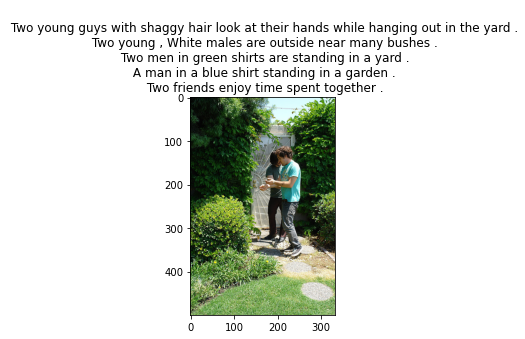

In [16]:
display_images([test_img + '.jpg'])

In [17]:
get_annotations('Annotations/' + test_img + '.xml')

{'boxes': {'1': [[158, 124, 218, 334], [196, 109, 260, 372]],
  '4': [[0, 219, 210, 472], [275, 214, 331, 336]],
  '6': [[196, 109, 260, 372]],
  '5': [[206, 143, 256, 243], [172, 155, 216, 235]],
  '7': [[206, 143, 256, 243]],
  '2': [[179, 124, 205, 155], [197, 113, 239, 145]],
  '3': [[172, 183, 197, 202], [157, 197, 190, 224]]},
 'scene': ['8', '9'],
 'nobox': ['10'],
 'width': 333,
 'height': 500,
 'depth': 3}

In [18]:
get_sentence_data('Sentences/' + test_img + '.txt')

[{'sentence': 'Two young guys with shaggy hair look at their hands while hanging out in the yard .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Two young guys',
    'phrase_id': '1',
    'phrase_type': ['people']},
   {'first_word_index': 4,
    'phrase': 'shaggy hair',
    'phrase_id': '2',
    'phrase_type': ['bodyparts']},
   {'first_word_index': 8,
    'phrase': 'their hands',
    'phrase_id': '3',
    'phrase_type': ['bodyparts']},
   {'first_word_index': 14,
    'phrase': 'the yard',
    'phrase_id': '8',
    'phrase_type': ['scene']}]},
 {'sentence': 'Two young , White males are outside near many bushes .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Two young , White males',
    'phrase_id': '1',
    'phrase_type': ['people']},
   {'first_word_index': 8,
    'phrase': 'many bushes',
    'phrase_id': '4',
    'phrase_type': ['scene']}]},
 {'sentence': 'Two men in green shirts are standing in a yard .',
  'phrases': [{'first_word_index': 0,
    'phrase': 'Two m

# Saving sports subset

In [550]:
# Saving csv of image names
#captions[captions['image_name'] in images == True]

In [552]:
df = pd.DataFrame()
for im in images:
    df_temp = captions[captions['image_name'] == im]
    df = pd.concat([df, df_temp])

In [555]:
df.head()

,image_name,comment_number,comment
67645,3364787667.jpg,0,A girl in a khaki jacket sitting next to a gi...
67646,3364787667.jpg,1,"Two women , in winter jackets and snow pants ..."
67647,3364787667.jpg,2,"Two female snowboarders , both wearing glasse..."
67648,3364787667.jpg,3,"Two women sitting on a ski lift , with mounta..."
67649,3364787667.jpg,4,Two woman are smiling for the camera on a ski...


In [556]:
df.to_csv('Sports Subset/sports_image_captions.csv')

In [561]:
# Copying sports images, sentence entities and annotation entities
for im in images:
    shutil.copyfile('flickr30k_images/'+im, 'Sports Subset/Images/' + im)
    im = im.split('.')[0]
    shutil.copyfile('Sentences/' + im + '.txt', 'Sports Subset/Sentences/' + im + '.txt')
    shutil.copyfile('Annotations/' + im + '.xml', 'Sports Subset/Annotations/' + im + '.xml')

In [562]:
len(exclude_img)

97